In [1]:
from trackeddy.trackeddy import *
import matplotlib.pyplot as plt
import cmocean as cm

In [ ]:
filepath = '/Users/jmtzmo/Downloads/sla_for_tracking/sla_0.25degs_interp_for_eddy_tracking_l4-duacs.nc'

In [ ]:
TEddy = TrackEddy(path=filepath,variable='sla')

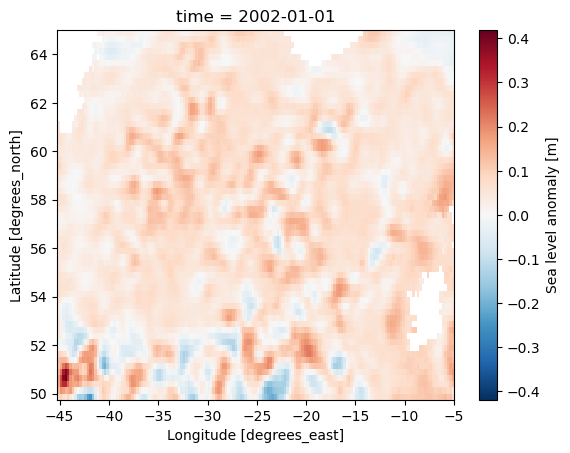

In [ ]:
TEddy.rawdata.isel(time=0).plot()

In [ ]:
# eddies, discarded = TEddy._detect_one_level(0.01)

In [ ]:
lin_levels = np.arange(-0.4,0.4,0.01)

df_eddy_multilevel_store = TEddy._detect_snapshot(0,lin_levels)

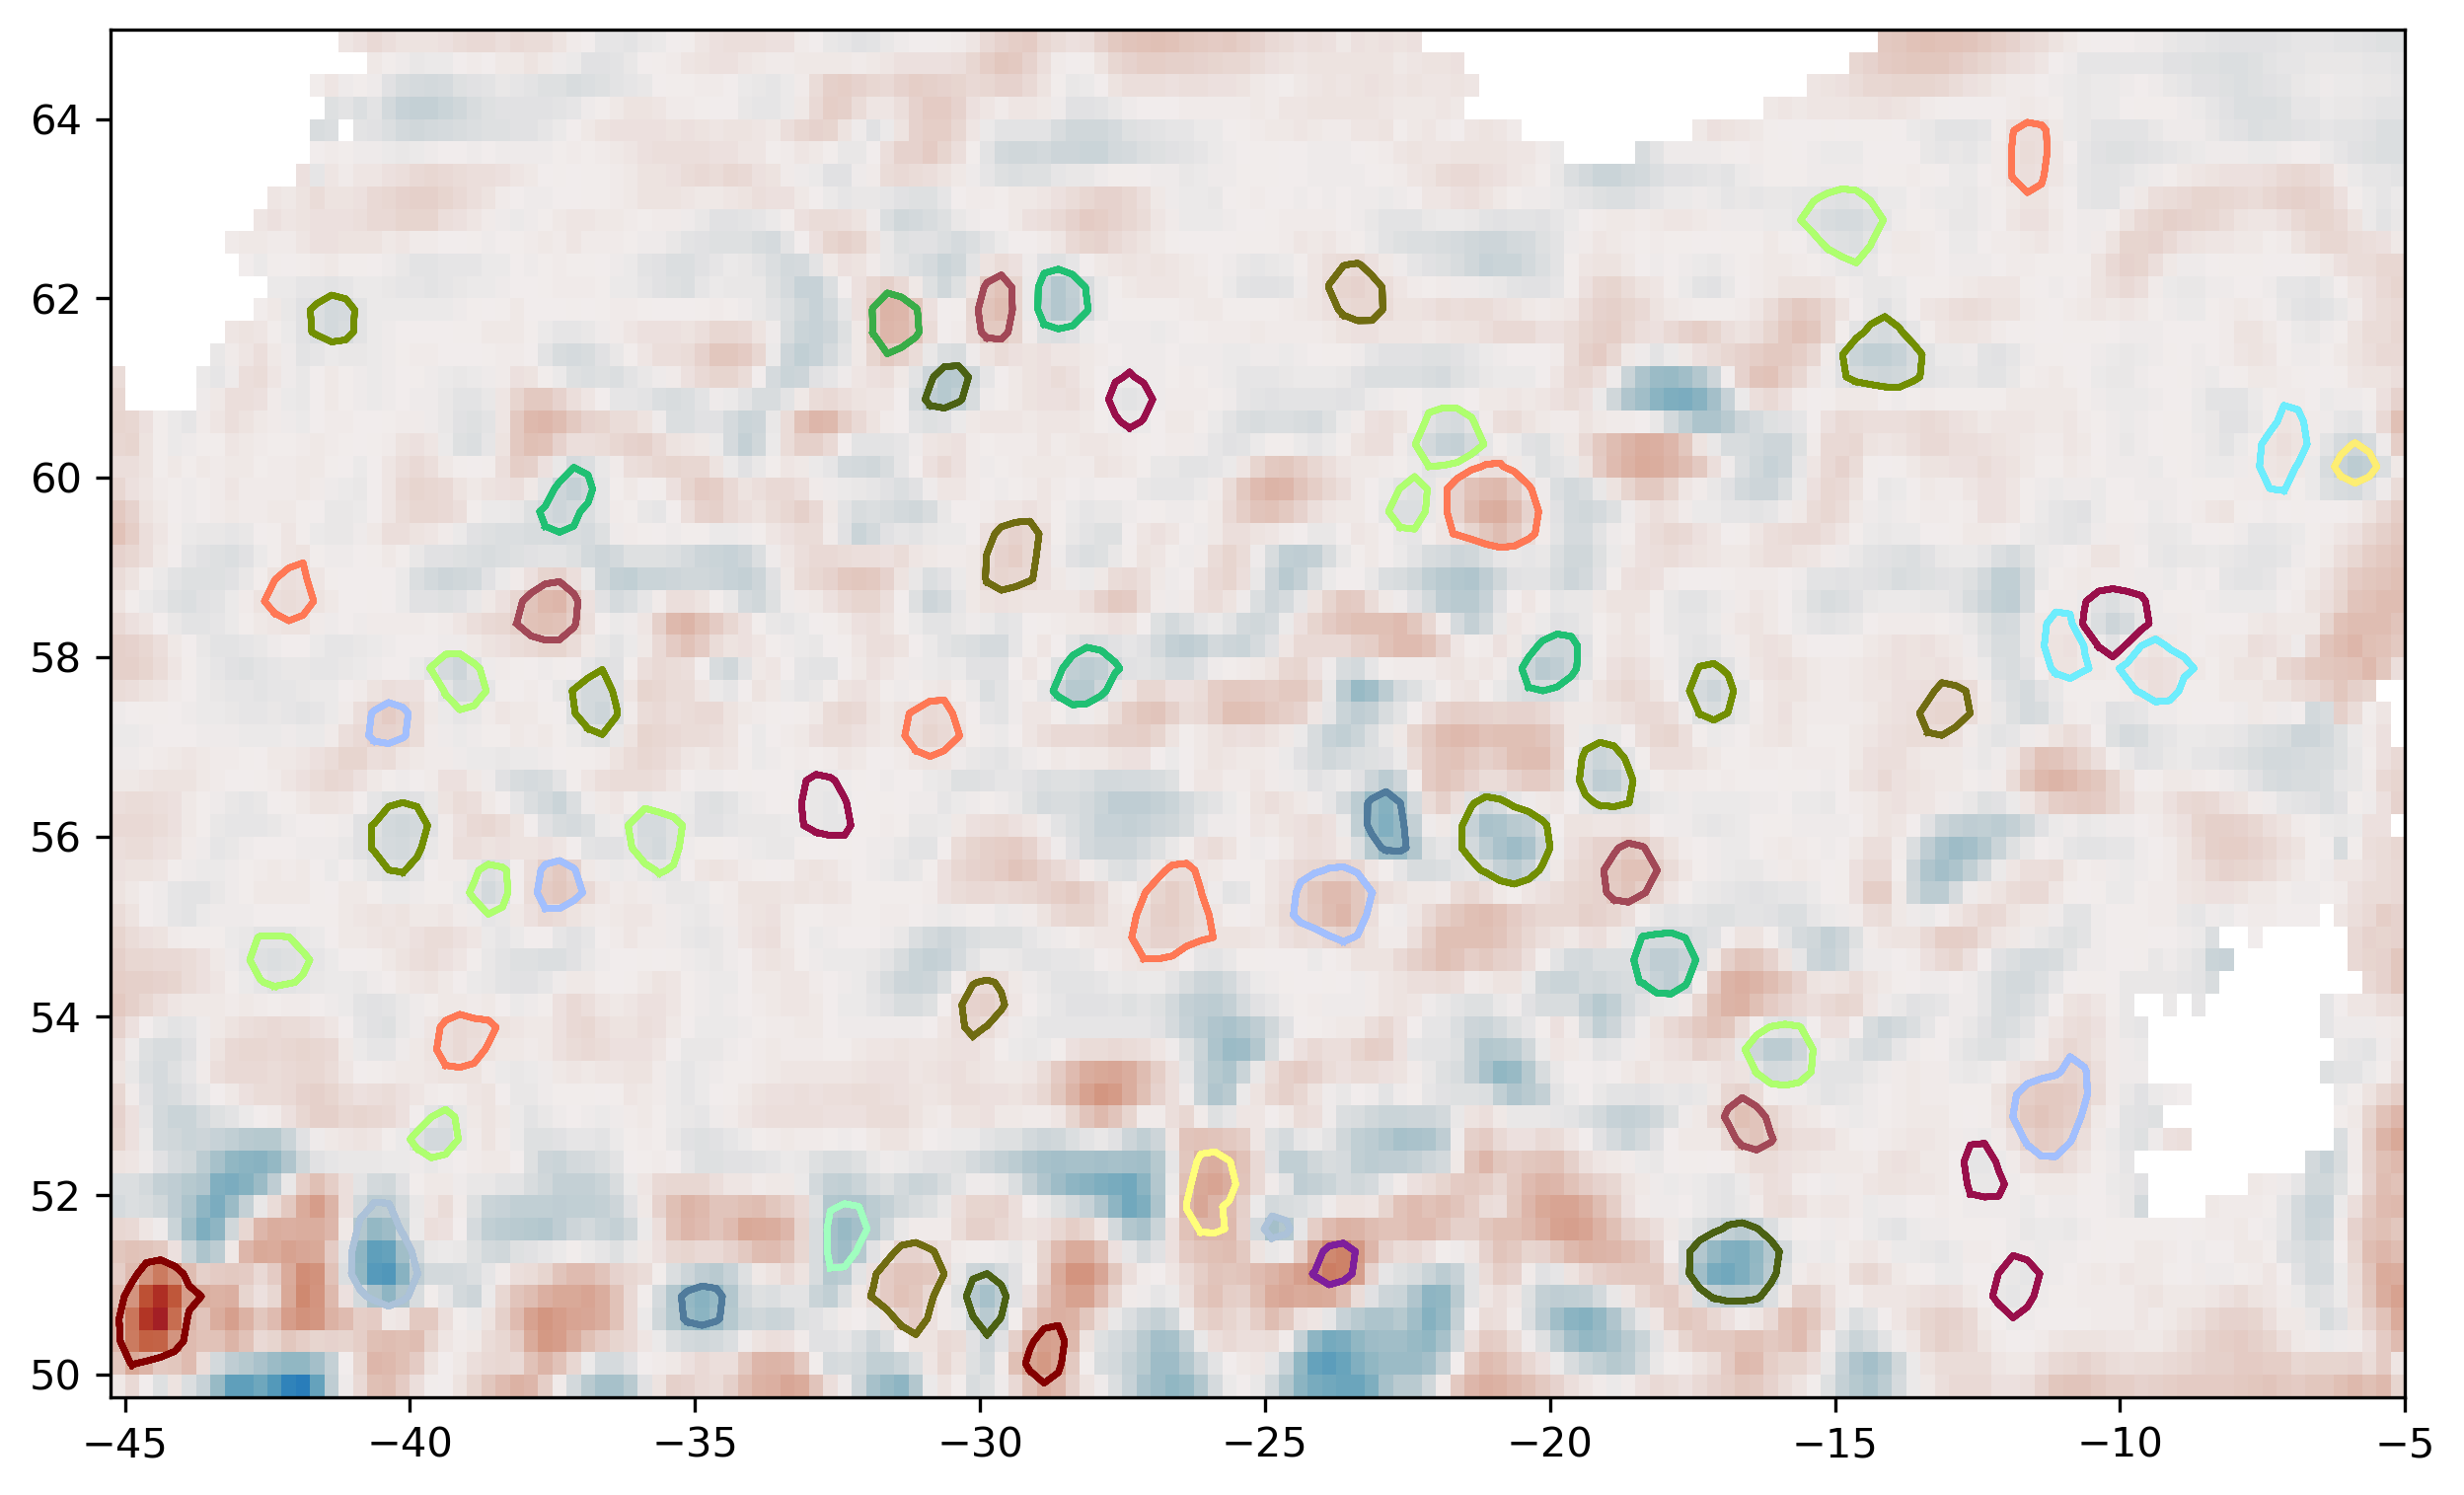

In [ ]:
TEddy.plot_eddy_detection_multilevel(df_eddy_multilevel_store)

In [ ]:
previous_time, current_time = TEddy.time_tracking(t0=0,tf=10,lin_levels=lin_levels)

0
1
2
3
4
5
6
7
8
9


In [8]:


def extract_previous_times(ntimes = 5):
    

0
1
75 10
2
91 10
3
113 10
4
133 10
5
6
7
8
9


In [9]:
#TODO Check if the function above is doing what we expect.
# IT seems to be doing the right thing, but there are some contours that are been identified that should not, perhaps make the criteria more strict. 


# FIXED:
    # Currently the distance function is doing something strange, but likely it has to do more with the renaming of eddies in time i.e. _rename_eddies_in_time

    # The issue occurs, because passing a detect_nearest an incomplete array with only the times identified at t=time-1, does not match the overall shape of the table, thus there is a shift in the index that is not accounted for.  


/var/folders/15/x70gn2y97r72ffx5ghvst8140000gq/T/ipykernel_95075/3131832155.py:10: PerformanceWarning: indexing past lexsort depth may impact performance.
  x_contour = track_in_time.loc[eddy,time].contour_path_x
/var/folders/15/x70gn2y97r72ffx5ghvst8140000gq/T/ipykernel_95075/3131832155.py:11: PerformanceWarning: indexing past lexsort depth may impact performance.
  y_contour = track_in_time.loc[eddy,time].contour_path_y


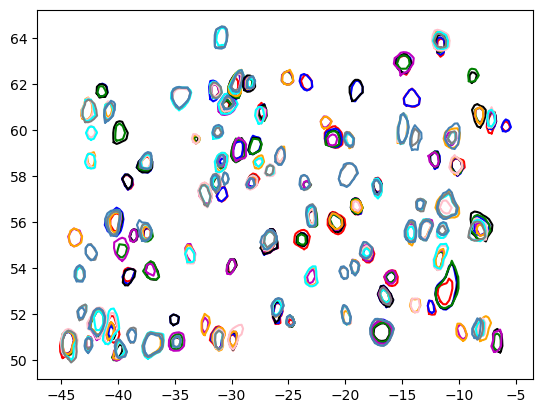

In [10]:
colors = ['r','b','k','g','m','orange','pink','cyan','gray','steelblue']
for eddy in track_in_time.index.get_level_values(level=0).unique():
    times = track_in_time.loc[eddy].index.get_level_values(level=0).unique()
    # num_colors = times.max()

    if len(times)<2:
        continue

    for time in times:
        x_contour = track_in_time.loc[eddy,time].contour_path_x
        y_contour = track_in_time.loc[eddy,time].contour_path_y 

        plt.plot(x_contour,y_contour,linestyle='-',color=colors[time])
    
    # plt.title(eddy)
    # plt.show()

    

In [ ]:
tracked_eddies = tracked_eddies.reset_index().set_index(['identifier','time','index']).sort_index(level=1)

In [ ]:
tracked_eddies.loc[0]

In [ ]:
test.reset_index().set_index(['time','identifier','index'])#.loc[index[near][0]]

In [ ]:
from trackeddy.trackeddy import *
import matplotlib.pyplot as plt
import cmocean as cm

In [ ]:
filepath = '/Users/jmtzmo/Downloads/sla_for_tracking/interp_for_tracking/sla_0.25degs_interp_for_eddy_tracking_NATL.nc'

In [ ]:
TEddy_model = TrackEddy(path=filepath,variable='sla')

In [ ]:
TEddy_model.identification_criteria['gaussian_fit']=0.5
TEddy_model.identification_criteria['eccentricity']=0.9
# TEddy_model.skip_gaussian_fit = True

In [ ]:
TEddy_model._filter_data_(TEddy_model.rawdata.isel(time_dim=0),filter='space')
eddies, discarded = TEddy_model._detect_one_level(0.1)

In [ ]:
discarded

In [ ]:
TEddy_model.plot_eddy_detection_in_level(eddies, discarded,markersize=5)

In [ ]:
lin_levels = np.arange(-0.4,0.4,0.01)

df_eddy_multilevel_store = TEddy_model._detect_snapshot(0,lin_levels)

In [ ]:
df_eddy_multilevel_store#.loc[3]

In [ ]:
TEddy_model.plot_eddy_detection_multilevel(df_eddy_multilevel_store)

In [ ]:
positive_eddy_field=reconstruct_syntetic(shape(sla_model),lon_model[0,:], lat_model[:,0],positive_eddies_model)

In [ ]:
levels2 = {'max':np.min(sla_model), 'min':0, 'step':-0.01}

negative_eddies_model=analyseddyzt (sla_model, lon_model[0,:], lat_model[:,0], 0, 1, 1, levels2, preferences=preferences, areamap=areamap,
areaparms=checkarea, filters=filters, maskopt='gaussian', diagnostics=False,pprint=True)

In [ ]:
negative_eddy_field=reconstruct_syntetic(shape(sla_model),lon_model[0,:], lat_model[:,0],negative_eddies_model)

In [ ]:
fig,ax = plt.subplots(1,2,figsize=(10,5))

ax[0].pcolormesh(lon_model,lat_model,sla_model[0,:,:],vmin=-0.5,vmax=0.5,cmap=cm.cm.balance)

ax[1].pcolormesh(lon_model,lat_model,positive_eddy_field[0,:,:]+negative_eddy_field[0,:,:],vmin=-0.5,vmax=0.5,cmap=cm.cm.balance)

In [ ]:
fig,ax = plt.subplots(1,2,figsize=(10,5))

ax[0].pcolormesh(lon,lat,sla[0,:,:],vmin=-0.5,vmax=0.5,cmap=cm.cm.balance)

for eddy in positive_eddies:
    eddy
    ax[0].plot(positive_eddies[eddy]['contour'][0][0],positive_eddies[eddy]['contour'][0][1])

for eddy in negative_eddies:
    ax[0].plot(negative_eddies[eddy]['contour'][0][0],negative_eddies[eddy]['contour'][0][1])


ax[1].pcolormesh(lon_model,lat_model,sla_model[0,:,:],vmin=-0.5,vmax=0.5,cmap=cm.cm.balance)

for eddy in positive_eddies_model:
    eddy
    ax[1].plot(positive_eddies_model[eddy]['contour'][0][0],positive_eddies_model[eddy]['contour'][0][1])

for eddy in negative_eddies_model:
    ax[1].plot(negative_eddies_model[eddy]['contour'][0][0],negative_eddies_model[eddy]['contour'][0][1])


ax[0].set_title('Satellite')

ax[1].set_title('Model')
